# Project: Investigate a tmdb movies DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>

In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%config IPCompleter.greedy = True

In [140]:
import pandas as pd
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
### Data Wrangling

In [141]:
# Loading tmdb-movies dataset, and display first 2 rows
tmdb_movies_df = pd.read_csv('tmdb-movies.csv')
tmdb_movies_df.head(n = 2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [142]:
# Shape of Dataset
tmdb_movies_df.shape

(10866, 21)

In [143]:
# Statistics of compatible columns before cleaning process
tmdb_movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [144]:
# First two records of Dataset 
tmdb_movies_df.head(n = 2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Data Cleaning

> **Step 1 :** Analyse columns name, do modify them if it's required.

In [145]:
tmdb_movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> **Conclusion** - In analysis, it seems all columns name are in lower case and separated with underscore, if there is any. Therefore, no need to modify any column name.

> **Step 2 :** Check out for null values and do drop them accordingly.

In [146]:
null_columns_tmdb_movies_series = tmdb_movies_df.isnull().sum()
null_columns_tmdb_movies_series

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [147]:
non_zero_null_columns_tmdb_movies_series = null_columns_tmdb_movies_series.nonzero()

# Here is the series of columns name, contain null values
null_columns_tmdb_movies_series.iloc[non_zero_null_columns_tmdb_movies_series[0]]

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

In [148]:
# Drop all null values, exist in above mentioned columns.
tmdb_movies_df.dropna(axis = 0, how = 'any', inplace = True)

In [149]:
# Do check if any null value exist in tmdb_movies_df DataFrame
tmdb_movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> **Step 3 :** Check out for duplicate records and do drop them accordingly.

In [150]:
duplicated_tmdb_movies_series = tmdb_movies_df.duplicated(keep = 'first')
np.count_nonzero(duplicated_tmdb_movies_series)

0

> **Conclusion** - It's sound great, no duplicate records exist in tmdb-movies DataBase.

<a id='eda'></a>
## Exploratory Data Analysis

#### Research Question 1 : Top 3 movies popular movies
> Get popularity, budget, revenue, original_title, cast, director information.

In [151]:
top_n_popular_movies_series = tmdb_movies_df['popularity'].nlargest(3)
top_n_popular_movies_series

0      32.985763
1      28.419936
629    24.949134
Name: popularity, dtype: float64

In [152]:
top_n_popular_movies_series.index

Int64Index([0, 1, 629], dtype='int64')

In [153]:
tmdb_movies_df.iloc[top_n_popular_movies_series.index, :].loc[:, ['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director']]

,popularity,budget,revenue,original_title,cast,director
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
2096,0.564203,7000000,382946,Hesher,Joseph Gordon-Levitt|Natalie Portman|Rainn Wil...,Spencer Susser


#### Research Question 2 : What feature are associated with high budge movies.

In [154]:
budget_mean = tmdb_movies_df['budget'].mean()
budget_mean
high_budget_tmdb_movies_df = tmdb_movies_df.query('budget > @budget_mean')
high_budget_tmdb_movies_df.describe()

34549235.94076305

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,643.000000,643.000000,6.430000e+02,6.430000e+02,643.000000,643.000000,643.000000,643.000000,6.430000e+02,6.430000e+02
mean,47836.662519,2.375841,9.045150e+07,2.900521e+08,115.721617,1413.730949,6.269051,2008.304821,9.328471e+07,3.015270e+08
std,65499.129441,2.688989,5.579672e+07,3.066970e+08,26.799915,1509.229870,0.774691,5.148005,5.499388e+07,3.189976e+08
min,12.000000,0.040858,3.500000e+07,0.000000e+00,76.000000,12.000000,2.200000,1983.000000,3.219999e+07,0.000000e+00
25%,5059.500000,0.997583,5.000000e+07,9.023983e+07,99.500000,371.500000,5.800000,2006.000000,5.082002e+07,9.279661e+07
50%,19899.000000,1.653924,7.000000e+07,1.839537e+08,112.000000,871.000000,6.300000,2009.000000,7.658245e+07,1.956863e+08
75%,62195.000000,2.815151,1.200000e+08,3.709614e+08,127.000000,1928.500000,6.800000,2012.000000,1.222614e+08,3.945523e+08
max,321741.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.100000,2015.000000,4.250000e+08,2.827124e+09


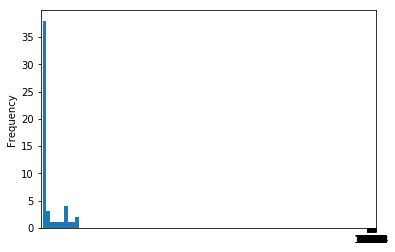

In [155]:
release_year_stats = tmdb_movies_df['release_year'].value_counts()

year_min = tmdb_movies_df['release_year'].min()
year_max = tmdb_movies_df['release_year'].max()

release_year_stats.plot(kind = 'hist', xticks = np.arange(year_min, year_max, 1))

#### Research Question 3 : Top 5 directors name, who generated the most revenue

In [156]:
tmdb_df_groupby_directors = tmdb_movies_df.groupby('director')

top_n_directors = 5
top_n_directors_series = tmdb_df_groupby_directors['revenue'].sum().sort_values(ascending = False)[0:top_n_directors]
top_n_directors_series

director
Peter Jackson        5943642820
Steven Spielberg     5257606337
James Cameron        4721952106
David Yates          4154295625
Christopher Nolan    4053833672
Name: revenue, dtype: int64

#### Research Question 4 : Top 5 directors name, who had maximum budget

In [157]:
top_n_directors_series = tmdb_df_groupby_directors['budget'].sum().sort_values(ascending = False)[0:top_n_directors]
top_n_directors_series

director
Peter Jackson        1086000000
Gore Verbinski       1030000000
Christopher Nolan     959000000
Michael Bay           856000000
Ridley Scott          847000000
Name: budget, dtype: int64